Please upload an image file...


Saving WhatsApp Image 2025-05-03 at 14.39.07_b65d7292.jpg to WhatsApp Image 2025-05-03 at 14.39.07_b65d7292.jpg



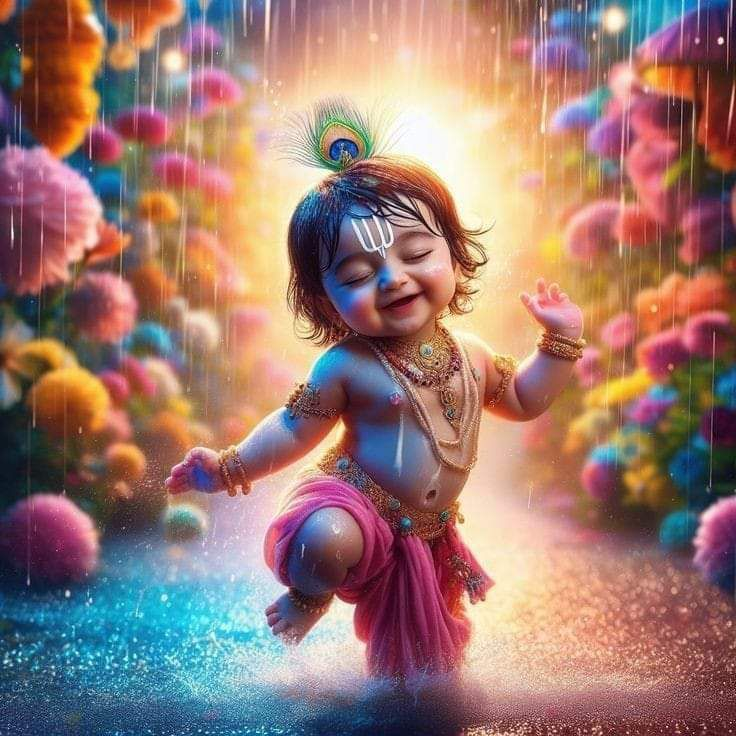

<IPython.core.display.Javascript object>

Image 'WhatsApp Image 2025-05-03 at 14.39.07_b65d7292.jpg' loaded successfully.
You can now zoom in/out using your trackpad's pinch gesture.
Click and drag to pan when zoomed in, and double-click to reset the view.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import io
from PIL import Image
import base64
from IPython.display import Javascript

# Upload widget
upload_button = widgets.Button(description='Upload Image')
output = widgets.Output()

def on_upload_clicked(b):
    clear_output(wait=True)
    print("Please upload an image file...")
    uploaded = files.upload()

    if uploaded:
        # Get the first file
        for filename, content in uploaded.items():
            img = Image.open(io.BytesIO(content))
            display_image_with_zoom(img, filename)
            break

upload_button.on_click(on_upload_clicked)
display(upload_button, output)

def display_image_with_zoom(img, filename):
    # Convert the image to base64 for embedding in HTML
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()

    # Calculate aspect ratio for proper sizing
    width, height = img.size
    max_width = 800
    max_height = 600

    # Scale down if image is too large while maintaining aspect ratio
    if width > max_width or height > max_height:
        ratio = min(max_width / width, max_height / height)
        display_width = int(width * ratio)
        display_height = int(height * ratio)
    else:
        display_width = width
        display_height = height

    # Create HTML/CSS/JS for image viewer with zoom functionality
    html_content = f"""
    <div style="margin: 20px auto; text-align: center;">
        <h3>{filename}</h3>
        <div id="zoom-container" style="margin: 0 auto; width: {display_width}px; overflow: hidden; position: relative;">
            <div id="zoom-image" style="width: 100%; height: 100%; transform-origin: 0 0;">
                <img src="data:image/png;base64,{img_str}"
                     style="max-width: 100%; display: block;"
                     id="zoomable-image">
            </div>
        </div>
        <div style="margin-top: 15px; background-color: #f0f0f0; padding: 10px; border-radius: 5px; display: inline-block;">
            <b>Controls:</b>
            <ul style="text-align: left; margin-bottom: 0;">
                <li>Pinch to zoom on trackpad</li>
                <li>Click and drag to pan when zoomed in</li>
                <li>Double-click to reset zoom</li>
            </ul>
        </div>
    </div>
    """

    # JavaScript for zoom functionality
    js_code = """
    // Wait for the elements to be fully loaded
    setTimeout(function() {
        const container = document.getElementById('zoom-container');
        const zoomElement = document.getElementById('zoom-image');
        const img = document.getElementById('zoomable-image');

        if (!container || !zoomElement || !img) {
            console.error('Required elements not found');
            return;
        }

        // Set initial values
        let scale = 1;
        let posX = 0;
        let posY = 0;
        let startPosX = 0;
        let startPosY = 0;
        let startX = 0;
        let startY = 0;
        let isPanning = false;

        // Update the transform
        function updateTransform() {
            zoomElement.style.transform = `translate(${posX}px, ${posY}px) scale(${scale})`;
        }

        // Handle wheel event for zoom
        container.addEventListener('wheel', function(e) {
            e.preventDefault();

            // Get mouse position relative to container
            const rect = container.getBoundingClientRect();
            const mouseX = e.clientX - rect.left;
            const mouseY = e.clientY - rect.top;

            // Calculate scale change
            const delta = -e.deltaY;
            const scaleChange = delta > 0 ? 1.1 : 0.9;
            const newScale = scale * scaleChange;

            // Limit scale
            if (newScale < 0.5 || newScale > 20) return;

            // Calculate new position to zoom at mouse point
            posX = mouseX - (mouseX - posX) * scaleChange;
            posY = mouseY - (mouseY - posY) * scaleChange;
            scale = newScale;

            updateTransform();
        });

        // Handle mouse down for panning
        container.addEventListener('mousedown', function(e) {
            e.preventDefault();
            startX = e.clientX;
            startY = e.clientY;
            startPosX = posX;
            startPosY = posY;
            isPanning = true;
            container.style.cursor = 'grabbing';
        });

        // Handle mouse move for panning
        window.addEventListener('mousemove', function(e) {
            if (!isPanning) return;
            posX = startPosX + (e.clientX - startX);
            posY = startPosY + (e.clientY - startY);
            updateTransform();
        });

        // Handle mouse up to stop panning
        window.addEventListener('mouseup', function() {
            isPanning = false;
            container.style.cursor = 'grab';
        });

        // Handle double click to reset
        container.addEventListener('dblclick', function() {
            scale = 1;
            posX = 0;
            posY = 0;
            updateTransform();
        });

        // Set initial cursor
        container.style.cursor = 'grab';
    }, 1000);  // Wait for 1 second to ensure all elements are loaded
    """

    # Display the HTML and execute the JavaScript
    display(HTML(html_content))
    display(Javascript(js_code))

    print(f"Image '{filename}' loaded successfully.")
    print("You can now zoom in/out using your trackpad's pinch gesture.")
    print("Click and drag to pan when zoomed in, and double-click to reset the view.")

# Display initial instructions
print("Click the 'Upload Image' button to select and upload an image file.")
print("After uploading, you can use trackpad pinch gestures to zoom in/out the image without losing quality.")